# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

# **Loading Dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # We will not use y

In [ ]:
print(x_train)
print(x_train.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(60000, 28, 28)


In [ ]:
# normalizing all images by dividing on 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# reshape in the input data to be suitable for the model
# Sequentail Model needs the data in the form of 4 Dimensions (# of photos, width, height, 1)
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# **Adding Noise**

In [ ]:
# add noise from normal (gaussian distribution)
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# **Showing Images**

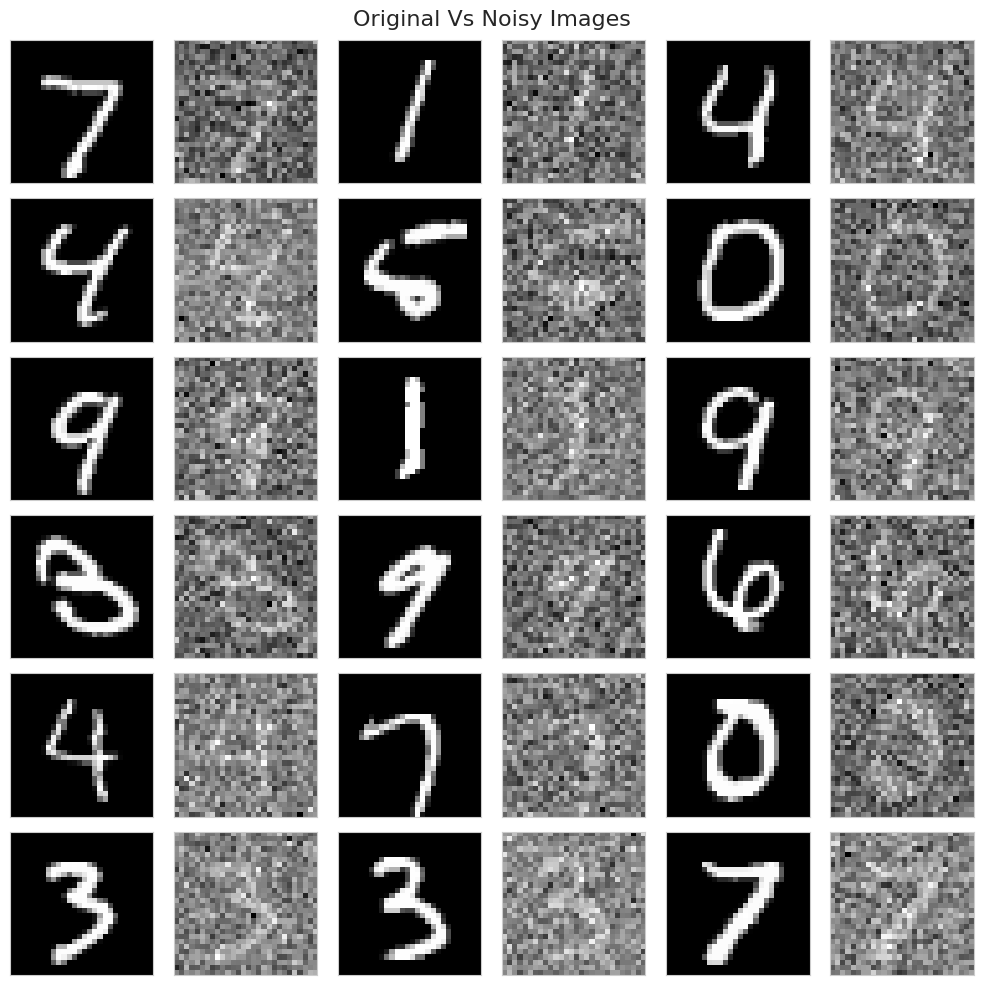

In [ ]:
# create a figure with 3x3 subplots
fig, axes = plt.subplots(6, 6, figsize=(10, 10))

# plot each image in the subplots
for i, ax in enumerate(axes.flat):
    if(i%2==1):
      ax.imshow(x_test_noisy[i-1].reshape(28, 28), cmap='gray')
    else:
      ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_xticks([])  # remove x-axis ticks
    ax.set_yticks([])  # remove y-axis ticks
fig.suptitle("Original Vs Noisy Images",fontsize=16)

plt.gray()
plt.tight_layout()

plt.show()



# **CNN Model**

In [ ]:
# Function to calculate accuracy
from keras import backend as K

# Define a custom metric function to calculate Mean Squared Error (MSE)
def mse(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred))

In [ ]:
# Creating Autoencoder
# Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image
model = Sequential([
                    # Encoder Network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # Decoder Network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    # Because RelU maps all number from 0 to infinity
                    # That means that we will have numbers of pixels that is very large
                    # These pixels' values must be either between 0 to 255 or 0 to 1 (normalized)
                    # So we will use sigmoid function to map all the numbers to the range of 0 to 1
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', mse])
# Binary Cross Entropy Loss calculates the difference between each pixel in the predicted with the actual value of it
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d_4 (UpSamplin  (None, 14, 14, 16)       

In [ ]:
# train the model
model.fit(x_train_noisy, x_train, epochs=5, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/5
235/235 [==============================] - 111s 472ms/step - loss: 0.1807 - accuracy: 0.8038 - mse: 0.0388 - val_loss: 0.1384 - val_accuracy: 0.8047 - val_mse: 0.0248
Epoch 2/5
235/235 [==============================] - 105s 448ms/step - loss: 0.1331 - accuracy: 0.8078 - mse: 0.0230 - val_loss: 0.1277 - val_accuracy: 0.8087 - val_mse: 0.0212
Epoch 3/5
235/235 [==============================] - 106s 451ms/step - loss: 0.1258 - accuracy: 0.8092 - mse: 0.0206 - val_loss: 0.1224 - val_accuracy: 0.8078 - val_mse: 0.0195
Epoch 4/5
235/235 [==============================] - 105s 448ms/step - loss: 0.1215 - accuracy: 0.8100 - mse: 0.0191 - val_loss: 0.1185 - val_accuracy: 0.8090 - val_mse: 0.0182
Epoch 5/5
235/235 [==============================] - 105s 449ms/step - loss: 0.1184 - accuracy: 0.8105 - mse: 0.0181 - val_loss: 0.1163 - val_accuracy: 0.8095 - val_mse: 0.0174


In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# predict the results from model (get denoised images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 4s 14ms/step


# **Visualizing Results**

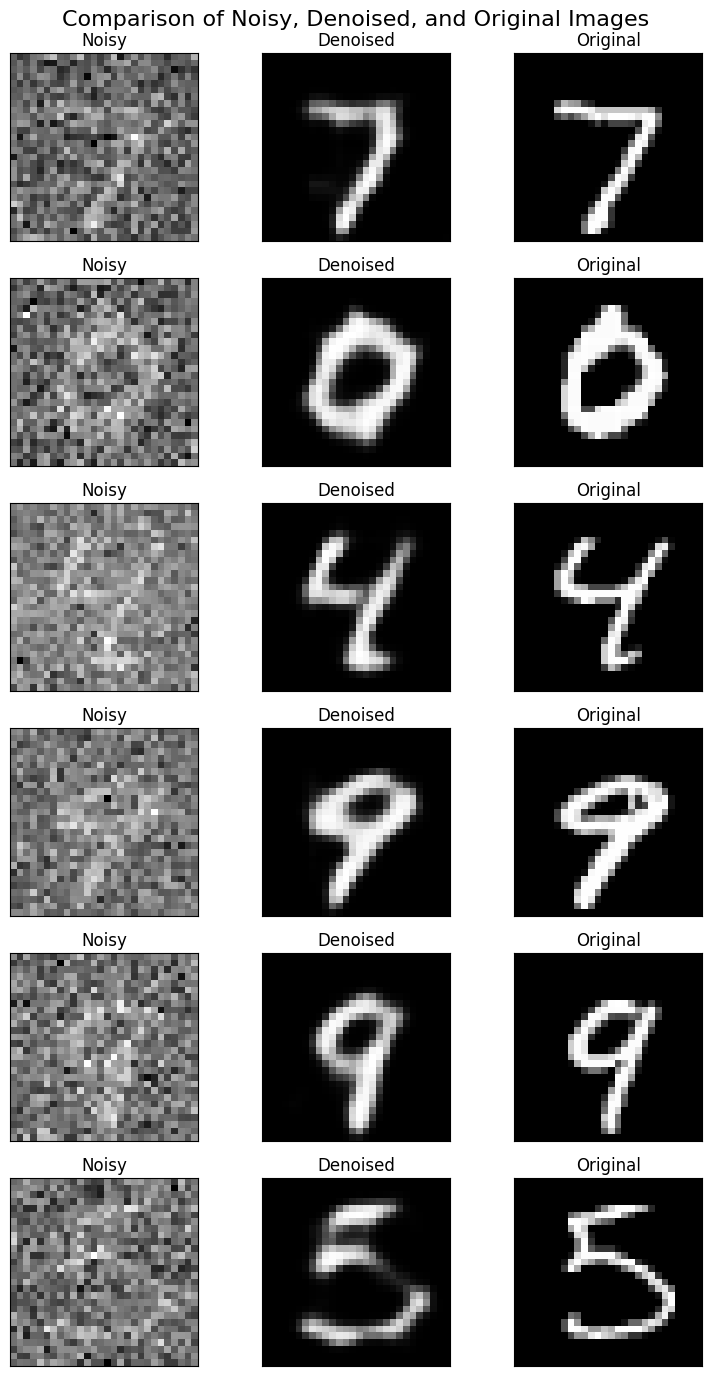

In [ ]:

# Create a figure with 3x3 subplots
fig, axes = plt.subplots(6, 3, figsize=(8, 14))

# Plot each image in the subplots
for i, ax in enumerate(axes.flat):
    if i % 3 == 1:
        ax.imshow(pred[i-1].reshape(28, 28), cmap='gray')
        ax.set_title("Denoised")
    elif i % 3 == 2:
        ax.imshow(x_test[i-2].reshape(28, 28), cmap='gray')
        ax.set_title("Original")
    else:
        ax.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
        ax.set_title("Noisy")
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

# Add a title
fig.suptitle("Comparison of Noisy, Denoised, and Original Images", fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()